Ack: https://www.kaggle.com/vfdev5/pil-vs-opencv

In [1]:
import PIL
import cv2

In [5]:

print PIL.__version__
print(cv2.__version__)
print(cv2.getBuildInformation())



5.0.0
3.1.0

General configuration for OpenCV 3.1.0 =====================================
  Version control:               unknown

  Platform:
    Host:                        Windows 6.2 AMD64
    CMake:                       3.3.1
    CMake generator:             Visual Studio 9 2008 Win64
    CMake build tool:            C:/Program Files (x86)/Microsoft Visual Studio 9.0/Common7/IDE/VCExpress.exe
    MSVC:                        1500

  C/C++:
    Built as dynamic libs?:      YES
    C++ Compiler:                C:/Program Files (x86)/Microsoft Visual Studio 9.0/VC/bin/x86_amd64/cl.exe  (ver 15.0.30729.1)
    C++ flags (Release):         /DWIN32 /D_WINDOWS /W4 /GR /EHa  /D _CRT_SECURE_NO_DEPRECATE /D _CRT_NONSTDC_NO_DEPRECATE /D _SCL_SECURE_NO_WARNINGS /Gy /bigobj /Oi  /wd4251 /wd4324 /wd4275 /wd4589 /MP1  /MD /O2 /Ob2 /D NDEBUG  /Zi
    C++ flags (Debug):           /DWIN32 /D_WINDOWS /W4 /GR /EHa  /D _CRT_SECURE_NO_DEPRECATE /D _CRT_NONSTDC_NO_DEPRECATE /D _SCL_SECURE_NO_WARNINGS 

In [10]:


import matplotlib.pylab as plt
%matplotlib inline



### Load Blur And Flip 

In [7]:
import numpy as np
from PIL import Image, ImageOps

def stage_1_PIL(filename):
    img_pil = Image.open(filename)
    img_pil = ImageOps.box_blur(img_pil, radius=1)
    img_pil = img_pil.transpose(Image.FLIP_LEFT_RIGHT)
    return np.asarray(img_pil)

def stage_1_cv2(filename):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.blur(img, ksize=(3, 3))
    img = cv2.flip(img, flipCode=1)
    return img

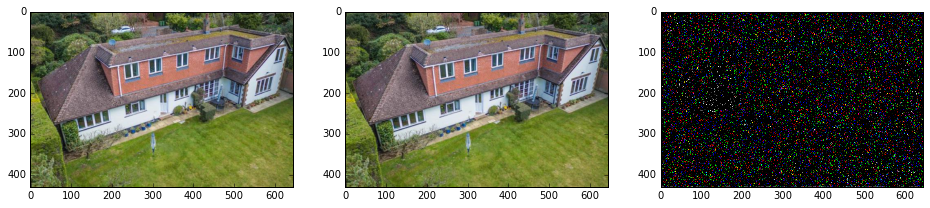

In [17]:
filenames = [ 'House.jpg']
f = 'House.jpg'
r1 = stage_1_PIL(f) 
r2 = stage_1_cv2(f)

plt.figure(figsize=(16, 16))
plt.subplot(131)
plt.imshow(r1)
plt.subplot(132)
plt.imshow(r2)
plt.subplot(133)
plt.imshow(np.abs(r1 - r2))

In [27]:
%timeit -n10 -r3 [stage_1_PIL(f) for f in filenames[:100]]
%timeit -n10 -r3 [stage_1_cv2(f) for f in filenames[:100]]

10 loops, best of 3: 10.1 ms per loop
10 loops, best of 3: 5.67 ms per loop


### Seprarating the load time

In [23]:
imgs_PIL = [Image.open(filename) for filename in filenames[:100]]
def cv2_open(filename):
    img = cv2.imread(filename)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

imgs_cv2 = [cv2_open(filename) for filename in filenames[:100]]

In [22]:
def stage_1b_PIL(img_pil):
    img_pil = ImageOps.box_blur(img_pil, radius=1)
    img_pil = img_pil.transpose(Image.FLIP_LEFT_RIGHT)
    return np.asarray(img_pil)

def stage_1b_cv2(img):    
    img = cv2.blur(img, ksize=(3, 3))
    img = cv2.flip(img, flipCode=1)
    return img



In [26]:
%timeit -n10 -r3 [stage_1b_PIL(img_pil) for img_pil in imgs_PIL]
%timeit -n10 -r3 [stage_1b_cv2(img) for img in imgs_cv2]

10 loops, best of 3: 5.16 ms per loop
10 loops, best of 3: 1.18 ms per loop
